In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import gsw as sw
import scipy.stats as ss
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import seaborn as sns

from netCDF4 import Dataset

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

In [2]:
# import cruise data

in_file = '../data/KuroAlldata.csv'
data = pd.read_csv(in_file, sep = ',')

in_file = '../data/Kuroshio_Phytoplankton.csv'
phyto = pd.read_csv(in_file, sep = ',')

phyto['sample'] = phyto["STATION"] + '-' + phyto["BOTTLE"]

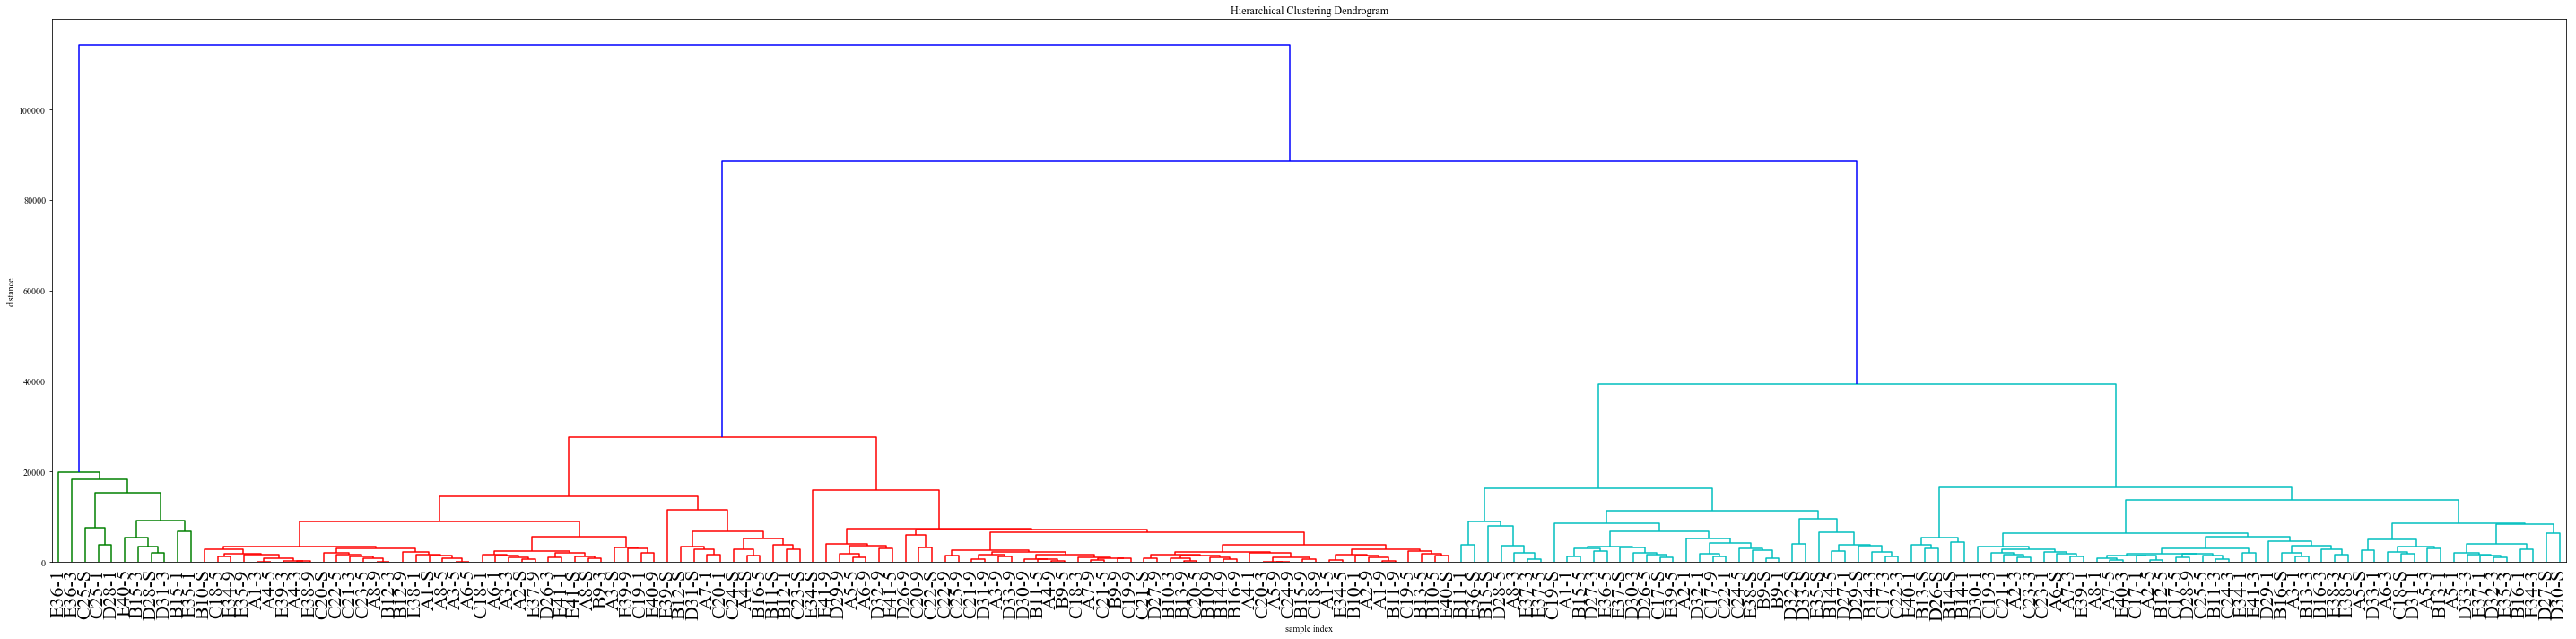

In [12]:
sub = phyto.drop(['STATION', 'BOTTLE', 'Diatom species richness','Total richness'], axis = 1)
sub = sub.set_index('sample')
del sub.index.name

Z = linkage(sub, 'ward')

fig1 = plt.figure(figsize=(40, 10), dpi = 300)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=22.,  # font size for the x axis labels
    labels=sub.index
)
plt.show()

fig1.savefig('../figures/phyto_dendrogram.png', dpi = 300)

In [4]:
# make presence absence table

pa = phyto.drop(['Diatom species richness','BOTTLE', "STATION", 'Total richness'], axis = 1)
pa[pa>0] = 1

sns.heatmap(pa, cmap = 'Blues')

TypeError: Cannot do inplace boolean setting on mixed-types with a non np.nan value

In [ ]:
phyto

In [ ]:
station = phyto["STATION"] + '-' + phyto["BOTTLE"]
print station